<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/Exam_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 5.5 MB/s eta 0:00:00


In [15]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback, ss
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

Open loop TF =  
  189 s + 2268
----------------
s^2 + 32 s + 252

closed loop TF =  
   189 s + 2268
------------------
s^2 + 221 s + 2520

Poles =  [-208.93906745+0.j  -12.06093255+0.j]
Zeros =  [-12.+0.j]
kp =  9.0
ess =  0.1


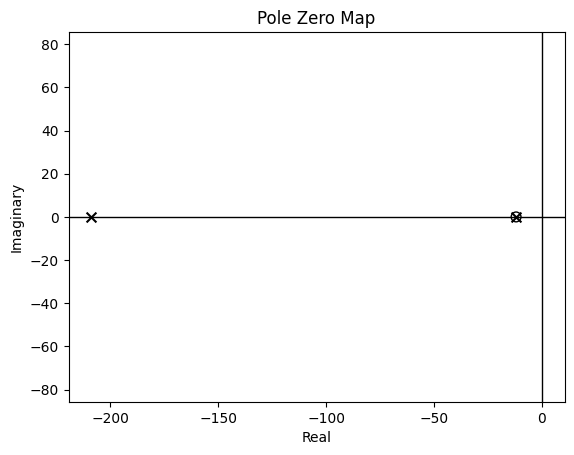

In [16]:
# Define your transfer function:
#G(s) = K(s+12) / (s+14)(s+18)

#wn = np.sqrt(361)
#zeta = 0#16/(2*wn)
#Tp = np.pi/(wn*np.sqrt(1-zeta**2))
#OS = np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))*100
#Ts = 4/(zeta*wn)
k = 189#21
num = [k, 12*k]
den = np.polymul([1, 14], [1, 18])
G = tf(num,den)
print ("Open loop TF = ", G)


CL = feedback(G, 1)

print("closed loop TF = ", CL)

(p,z) = pzmap(CL)
print("Poles = ",p)
print("Zeros = ",z)

kp = G.dcgain()
print("kp = ", kp)
print("ess = ", 1/(1+kp))

In [17]:
sys = ss(G)
print(sys)

<LinearIOSystem>: sys[23]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ -32. -252.]
     [   1.    0.]]

B = [[1.]
     [0.]]

C = [[ 189. 2268.]]

D = [[0.]]



Text(0, 0.5, 'volt')

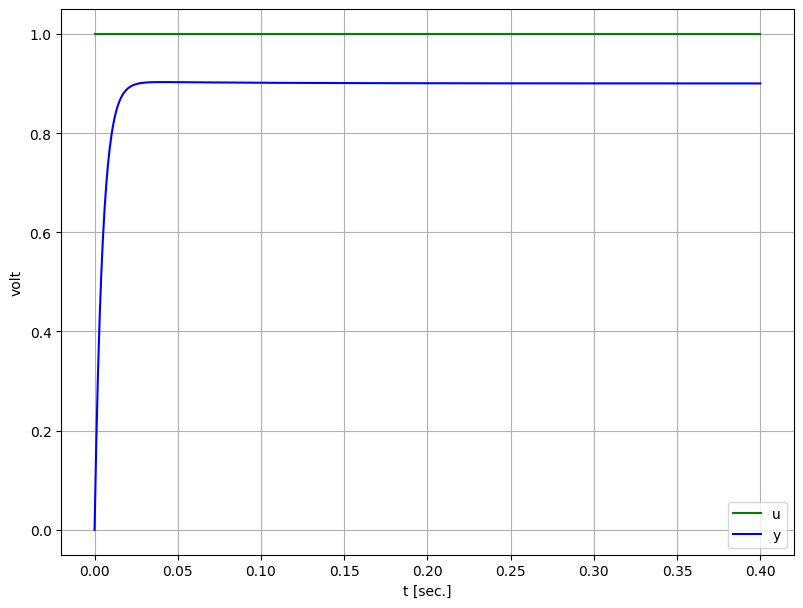

In [12]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 0.4
dt = 0.001
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)
#u = 1 * t

# Simulation :
(t, y) = forced_response(CL, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")